## Aufgabe

Im folgenden wurde ein künstlicher Datensatz mit Hilfe der Funktion `make_blobs()` erstellt. Er besteht aus drei Teilbereichen, die jeweils durch eine Gaussverteilung mit unterschiedlicher Standardabweichung erzeugt worden. Für jeden Punkt ist bekannt, durch welche der drei Gaussverteilungen er entstanden ist. Diese Klasseninformation ist in `y` gespeichert.

Visualisieren Sie die tatsächliche Zugehörigkeit, die Clusterzugehörigkeit mittels K-Means und ein Klassifikationsergebnis mittels Logistic Regression. Erklären Sie die beobachteten Effekte.

In [1]:
from sklearn import datasets
X,y = datasets.make_blobs(n_samples=1500,
                          cluster_std=[1.0, 2.5, 0.5],
                          random_state=170)

[[ -6.11119721   1.47153062]
 [ -7.49665361   0.9134251 ]
 [-10.84489837  -7.55352273]
 ...
 [  1.64990343  -0.20117787]
 [  0.79230661   0.60868888]
 [  1.91226342   0.25327399]]
[1 1 0 ... 2 2 2]


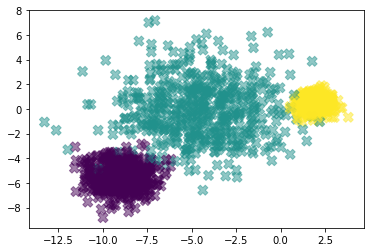

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print(X)
print(y)


#Y_test = Y_test.reshape(-1,1)


plt.scatter(X[:,0],X[:,1],c=y,alpha=0.5,marker='X',s=100)
#plt.show()

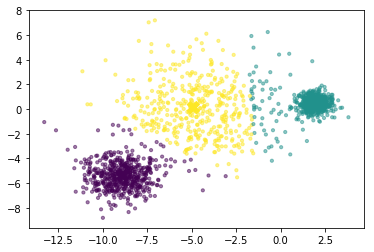

In [37]:
scaler = StandardScaler()
scaler.fit(X,y)

model = KMeans(n_clusters = 3)
model.fit(X)

labels = model.labels_
centers = model.cluster_centers_

centers_transformed = scaler.inverse_transform(centers)
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.5,s=10)
plt.scatter(centers[:,0],centers[:,1],c=range(len(centers)),marker = 'X',s=150)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.25)


model=LogisticRegression();
model.fit(X_train,Y_train)
print("Trainingsdaten: ", model.score(X_train,Y_train))
print("Testdaten: ", model.score(X_test,Y_test))

print(model.coef_)
print(model.intercept_)
prediction = model.predict(X_test)
print("prediction:",prediction)

Trainingsdaten:  0.9484444444444444
Testdaten:  0.968
[[-0.43159284 -1.3072621 ]
 [-0.50154746  1.00274794]
 [ 2.95839017  0.2302003 ]]
[-7.29245046 -0.98077517 -1.27345609]
prediction: [0 0 1 2 0 2 0 2 2 1 1 2 0 0 0 1 2 0 0 2 0 1 2 1 1 2 1 1 2 2 1 1 1 1 2 2 2
 2 2 0 0 2 1 1 1 2 2 0 0 0 2 2 2 2 0 0 0 2 1 2 2 0 2 0 2 0 0 2 2 0 2 1 1 2
 1 2 2 0 2 0 0 0 1 2 1 2 1 1 2 0 1 0 2 2 0 1 0 1 0 1 0 0 1 0 0 0 1 0 2 0 1
 1 2 0 1 1 2 0 1 1 1 2 0 2 1 1 1 0 0 1 1 1 2 1 0 1 2 2 1 2 0 1 2 1 2 1 2 1
 1 0 0 2 0 0 1 0 1 2 2 2 1 1 0 1 2 1 0 0 2 1 2 1 0 0 0 1 2 0 2 2 2 1 1 0 2
 2 2 1 2 0 2 0 0 2 1 1 2 2 2 2 0 1 0 1 0 1 1 1 2 1 2 0 1 0 0 1 0 0 2 0 0 0
 2 1 1 1 0 2 2 0 2 1 0 2 0 0 1 1 2 0 2 0 2 1 0 0 1 2 1 2 2 1 1 1 2 0 0 1 1
 2 2 1 2 1 0 0 0 1 0 2 2 1 1 1 0 1 1 2 2 0 1 2 0 2 2 0 0 0 0 2 0 0 2 1 0 1
 0 2 2 2 0 1 2 0 1 1 1 0 0 1 0 1 1 0 0 2 0 0 0 0 2 1 2 0 0 0 1 0 2 2 0 1 2
 2 1 2 1 0 2 2 2 1 0 2 2 1 0 2 0 0 1 0 2 1 0 1 0 0 1 0 0 2 2 0 0 2 2 0 1 1
 0 0 1 2 2]


/home/alice/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alice/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


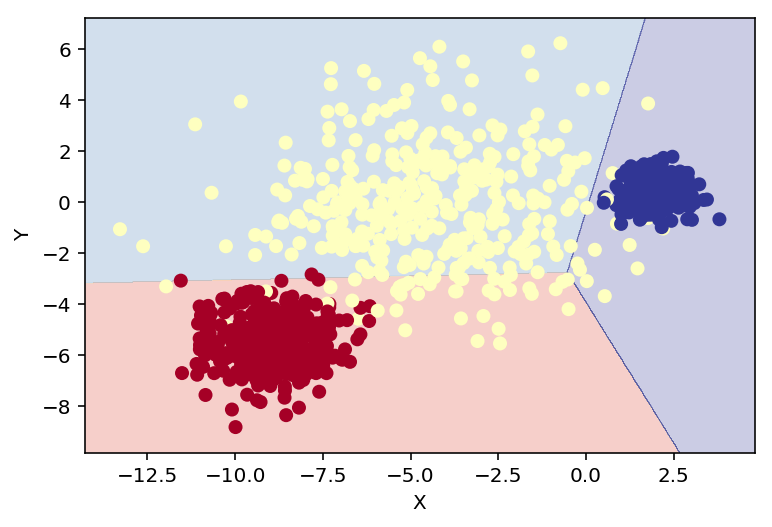

In [40]:
from helper import plot_classifier
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "X", ylabel = "Y")